# 파이썬에서 R실행

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [Python, R]

## 파이썬에서 R실행하기 

`1.` [아나콘다](https://www.anaconda.com/products/individual)에 접속한 후 Anaconda Installers에서 64-Bit Graphical Installer(477MB)설치

`2.` Anaconda Prompt (anaconda3) 실행

`3.` 아래와 같이 입력

```
(base) C:\Users\한재수> conda create -n py38r40 python=3.8

(base) C:\Users\한재수> conda activate py38r40

(py38r40) C:\Users\한재수> conda install jupyter lab

(py38r40) C:\Users\한재수> pip install rpy2

(py38r40) C:\Users\한재수> R
```

`4.` R에서 아래와 같이 입력

```
\> install.packages("IRcernel")

\> IRcernel::installspec()

\> R.home() ## 나오는 경로 복사

\> q() ## R 종료
```

`5.` 다시 프롬프트로 돌아와서 주피터랩 실행

```
(py38r40) C:\Users\한재수> jupyter lab
```

`6.` R세팅은 끝났고 파이썬에서 R을 사용하려면 아래와 같이 입력(주피터랩 킬 때마다 한 번씩만 입력)

```python
import os

os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' ## R.HOME 에서 복사한 경로

import rpy2 

%load_ext rpy2.ipython
```

`7.` R사용

셀 마다 %R or %%R 입력하여 사용

In [1]:
import os

In [2]:
os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' ## R.HOME 에서 복사한 경로

In [3]:
import rpy2

In [4]:
%load_ext rpy2.ipython

C:\anaconda3\envs\py38r40\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [9]:
%R q <- c(1, 2, 3)
%R print(q)

Q = [1, 2, 3]
print(Q)

[1] 1 2 3
[1, 2, 3]


In [9]:
%%R
x <- c(1, 2, 3, 4, 5, 8, 9, 11)
y <- c(5, 1, 7, 12, 11, 5, 7, 21)
model <- lm(y ~ x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3741 -4.4232  0.9096  3.2796  6.4840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.9958     3.4644   0.865    0.420
x             1.0473     0.5469   1.915    0.104

Residual standard error: 5.185 on 6 degrees of freedom
Multiple R-squared:  0.3793,	Adjusted R-squared:  0.2759 
F-statistic: 3.667 on 1 and 6 DF,  p-value: 0.104



`-` %R -i 을 통해 파이썬에서 정의한 변수를 R에서 사용할 수 있음

In [6]:
import numpy as np
data = np.random.rand(50)

%R -i data

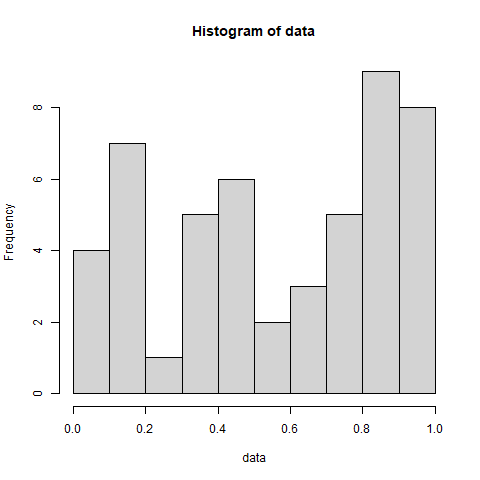

In [7]:
%%R
hist(data)